Accuracy: 0.9962264150943396
Mean Squared Error: 0.0037735849056603774
Sensitivity: 0.9931506849315068
Specificity: 1.0
Matthews Correlation Coefficient: 0.9924083984044797
ROC AUC: 0.9952803039023829


<Figure size 1000x800 with 0 Axes>

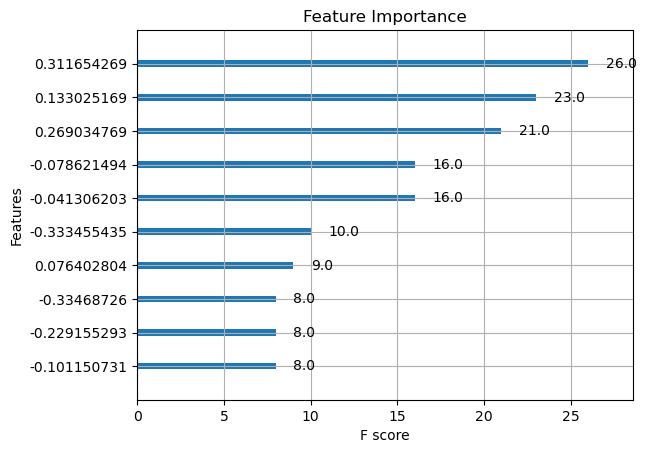

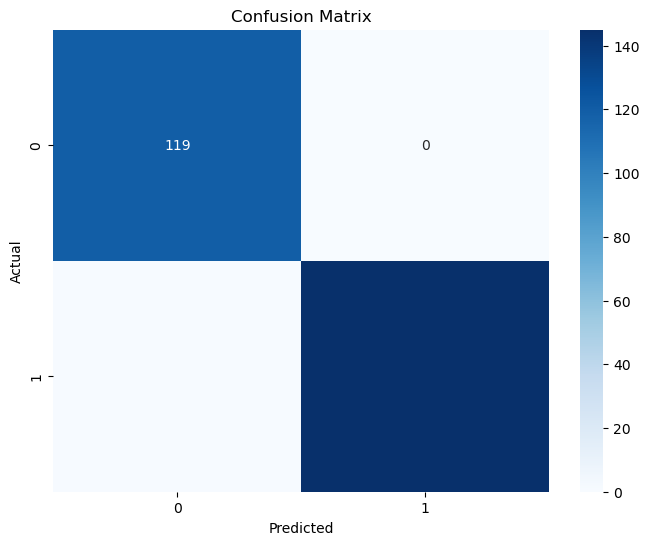

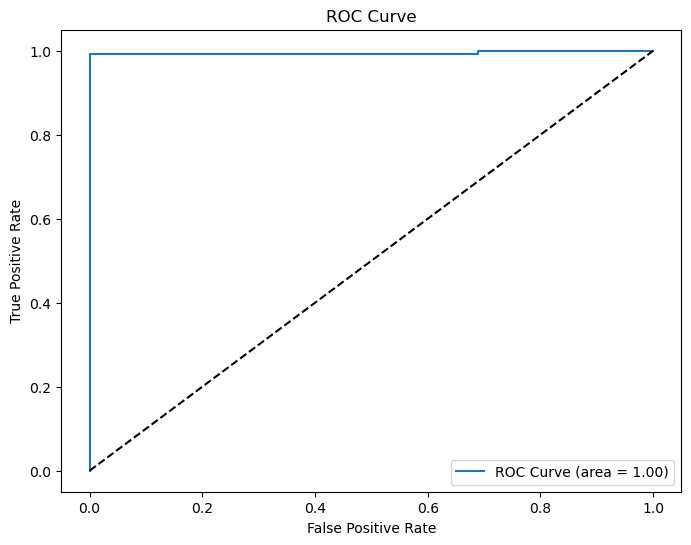

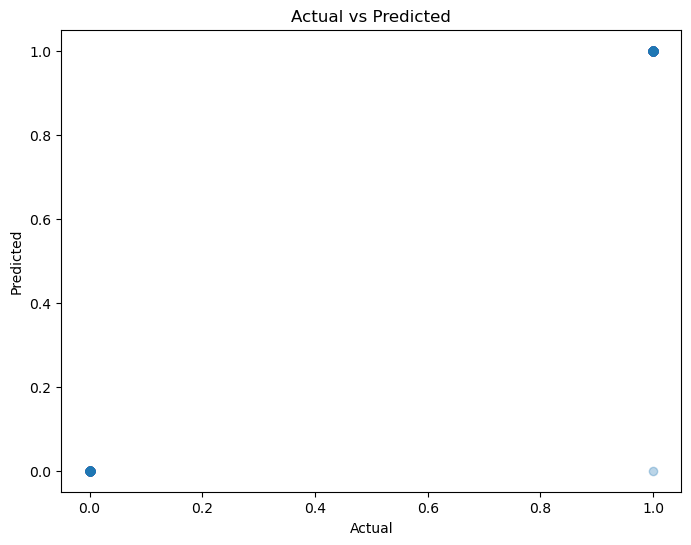

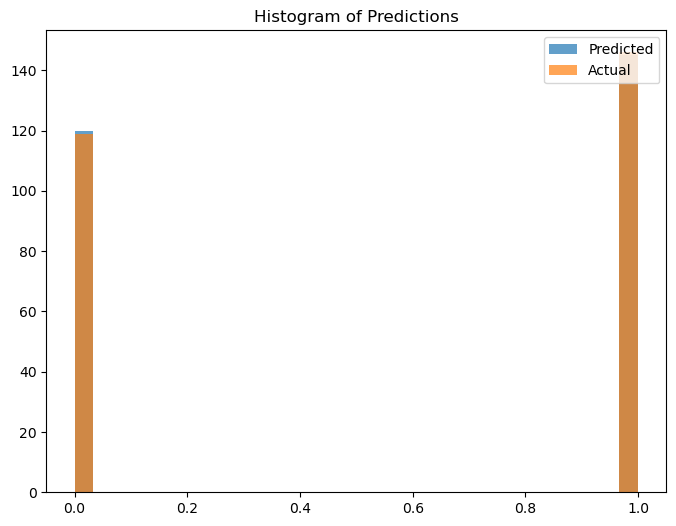

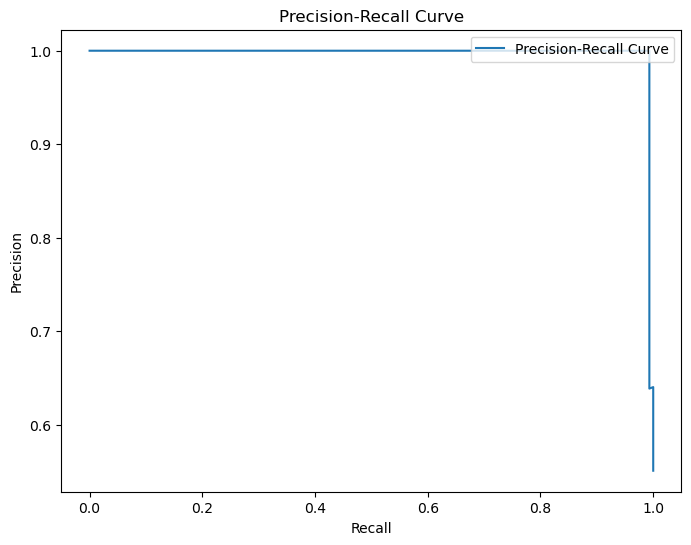

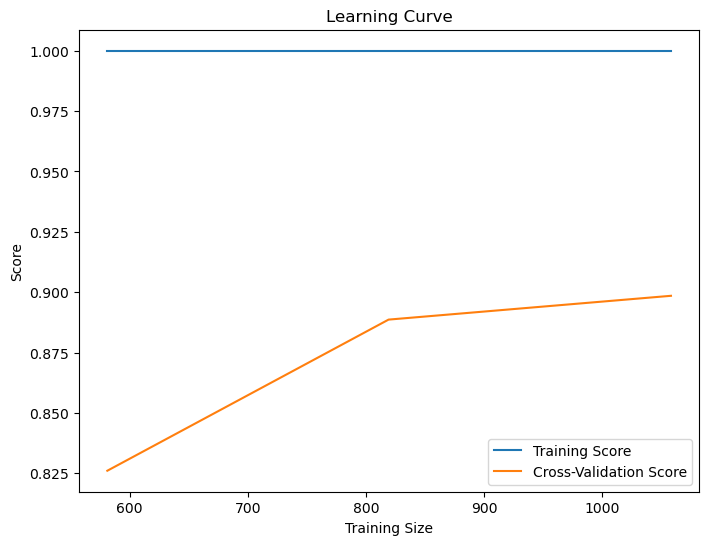

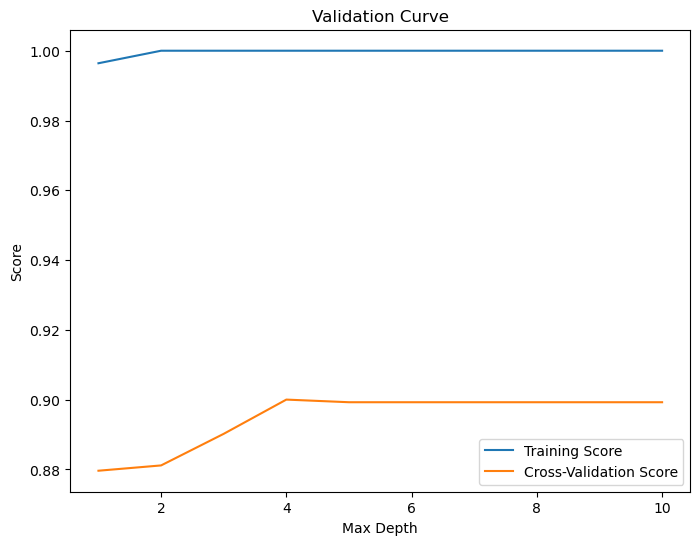

F1 Score: 0.9965635738831615


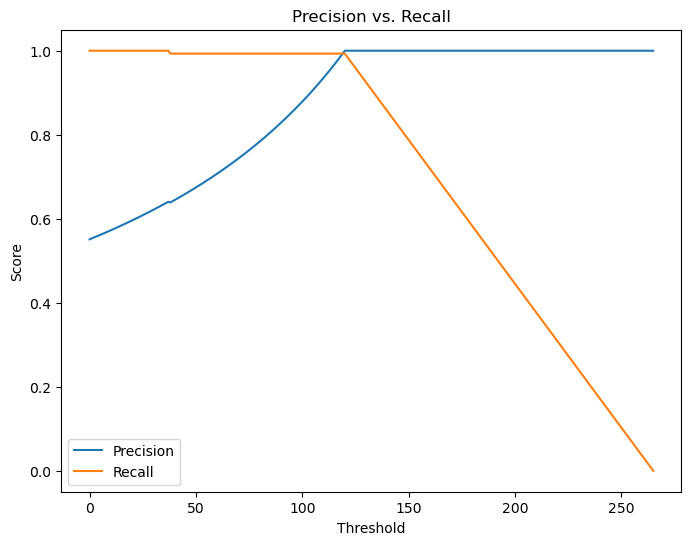

ValueError: Layout of 2x5 must be larger than required size 64

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Load dataset
csv_file_path = r"D:\Salman_Sir_Paper\2nd version\Aftter shape 64.csv"# Update this path to where your CSV is located
data = pd.read_csv(csv_file_path)

# Assuming the last column is the target and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {mse}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'ROC AUC: {roc_auc}')

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_clf, max_num_features=10)
plt.title('Feature Importance')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Additional Plots (Examples)
# 1. Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 2. Histogram of Predictions
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=30, alpha=0.7, label='Predicted')
plt.hist(y_test, bins=30, alpha=0.7, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Predictions')
plt.show()

# 3. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# 4. Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(xgb_clf, X, y, cv=5, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# 5. Validation Curve (example with max_depth parameter)
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(xgb_clf, X, y, param_name='max_depth', param_range=param_range, cv=5, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores_mean, label='Training Score')
plt.plot(param_range, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.show()

# 6. F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# 7. Precision vs. Recall
plt.figure(figsize=(8, 6))
plt.plot(precision, label='Precision')
plt.plot(recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs. Recall')
plt.legend(loc='best')
plt.show()

# 8. Feature Distribution
plt.figure(figsize=(12, 6))
X.hist(bins=30, figsize=(12, 6), layout=(2, 5))
plt.suptitle('Feature Distribution')
plt.show()

# 9. Pair Plot
sns.pairplot(data)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

# 10. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
